In [1]:
# ----- installing all of the necessary libraries for this project -----
!pip install matplotlib
!pip install numpy

In [2]:
# ----- doing all the necessary imports -----
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import numpy as np

In [3]:
# ----- initialising the wave parameters -----
L = 30.0              # (system length)
dx = 0.3              # (discrete spatial stepsize for x-axis)
dy = dx               # (discrete spatial stepsize for y-axis)
c = 1.0               # (wave speed)
dt = 0.5 * dx / c     # (time stepsize)
sigma = 1.5           # (with of the pulse)
nsteps = 200          # (number of steps / frames for plotting)

(x_start, y_start) = (L / 2, L / 2)      # (center of the system, the point where the pulse will be applied)

In [4]:
# ----- defining the arrays that store positions -----
x = np.arange(0, L, dx)
y = np.arange(0, L, dy)
xx, yy = np.meshgrid(x, y)

# ----- wave initialisation -----
phi = np.zeros((len(x), len(y)))     # (wave amplitude)
psi = np.zeros((len(x), len(y)))     # (velocity, time derivative of phi)
npts = len(x)                        # (number of spatial points)

In [5]:
# ----- adding the gaussian pulse -----
phi = np.exp(-((xx - x_start)**2 + (yy - y_start)**2) / (2 * sigma**2))

In [6]:
# ----- defining the Laplacian function -----
def laplacian(f):
    laplacian_f = np.zeros_like(f)
    laplacian_f[1:-1, 1:-1] = (
        (f[:-2, 1:-1] + f[2:, 1:-1] - 2 * f[1:-1, 1:-1]) / dx**2 +
        (f[1:-1, :-2] + f[1:-1, 2:] - 2 * f[1:-1, 1:-1]) / dy**2
    )

    return laplacian_f

In [7]:
# ----- RK4 function for updating phi and psi -----
def rk4_step(phi, psi, dt):
    # ----- helper to compute d(phi)/dt and d(psi)/dt -----
    def rhs(phi, psi):
        dphi_dt = psi
        dpsi_dt = c**2 * laplacian(phi)

        return dphi_dt, dpsi_dt

    # ----- RK4 stages -----
    k1_phi, k1_psi = rhs(phi, psi)
    k2_phi, k2_psi = rhs(phi + 0.5 * dt * k1_phi, psi + 0.5 * dt * k1_psi)
    k3_phi, k3_psi = rhs(phi + 0.5 * dt * k2_phi, psi + 0.5 * dt * k2_psi)
    k4_phi, k4_psi = rhs(phi + dt * k3_phi, psi + dt * k3_psi)

    # ----- updating phi and psi -----
    phi_next = phi + (dt / 6) * (k1_phi + 2 * k2_phi + 2 * k3_phi + k4_phi)
    psi_next = psi + (dt / 6) * (k1_psi + 2 * k2_psi + 2 * k3_psi + k4_psi)

    return phi_next, psi_next

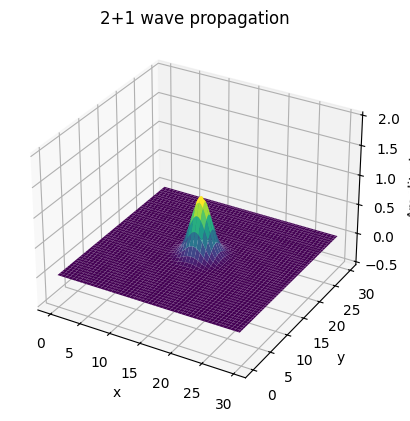

In [8]:
# ----- initialising the plot -----
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_zlim(-0.5, 2)
ax.set_title("2+1 wave propagation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Amplitude")

# ----- doing the first step in plotting -----
surface = ax.plot_surface(xx, yy, phi, cmap="viridis", edgecolor="none")

In [9]:
# ----- function to update plot animation -----
def update(frame):
    global phi, psi, surface

    # ----- updating phi and psi using RK4 -----
    phi, psi = rk4_step(phi, psi, dt)

    ax.set_title(f"t = {frame * dt:.2f}")
    print(f"Processing frame {frame}")

    # ----- clearing and redrawing the plot -----
    surface.remove()
    surface = ax.plot_surface(xx, yy, phi, cmap="viridis", edgecolor="none")

    return surface,

In [10]:
# ----- generating the animation -----
animation = FuncAnimation(fig, update, frames=nsteps, interval=50)

In [11]:
# ----- preview of the plot animation -----
animation